<a href="https://colab.research.google.com/github/ruasnv/Stock-Prediction-1.0/blob/master/nlp101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP 101**
This notebook is a blend of techniques, methods and knowledge I learned through out my NLP lecture.

#Lecture 1
Just like any data related field Nlp cycle also starts with "Data preperation". This involves tokenization, text cleaning, text normalization, text representation etc. Lets first learn how to tokenize our text data into smallest units of words.

1) Tokenization

In [ ]:
#Some methods for tokenization
#string.split(sep=None,maxsplit=-1)
#sep=seperator used to split
#maxsplit=max number of splits to perform
#RETURNS a list of strings
text="NLP is so fun wow!"
words=text.split()
words_max_Split=text.split(maxsplit=2)
print(words)
print("Max split set to 2: ", words_max_Split)

#REGEX SPLIT
#Used for complex split patterns
#importting re lib is needed
import re
words_split_regex = re.split(r'\s+',text)
print("Regex split: ",words_split_regex)

#Converting to a consistant format, usally lowercase
words_normalized=text.lower()
print("Normalized text: ",words_normalized)

['NLP', 'is', 'so', 'fun', 'wow!']
Max split set to 2:  ['NLP', 'is', 'so fun wow!']
Regex split:  ['NLP', 'is', 'so', 'fun', 'wow!']
Normalized text:  nlp is so fun wow!


2) Cleaning

Removing punctuations
Handling contrations
Correcting typos
Removing special char
Removing HTML tags
Dealing with noise



In [ ]:
#Handling Contrations
import re
def expand_contractions(text):
  contractions = {
    "can't": "cannot",
    "it's": "it is",
    "i'll": "i will",
    "i'm": "i am",
    "i've": "i have",
    "i'd": "i would",
  }
  # Regular expression to match contractions
  contraction_re = re.compile('(\w+[\'.\'|\"])(\w+)')
  def replace_contraction(match): #match is generated as a result of regex
    expanded = contractions.get(match.group(0))
    return expanded
  return contraction_re.sub(replace_contraction, text)

text = "Have you seen Notre Dame Musical??? I've but i can't remember it so well! :)"
lowercase_text = text.lower()
expanded_text = expand_contractions(lowercase_text)
print(f"Expanded Text: {expanded_text}\n")

#Remove punctuations
def remove_punctuation(text):
  return re.sub(r'[^\w\s]', '', text)

cleaned_text = remove_punctuation(expanded_text)
print(f"Cleaned Text: {cleaned_text}\n")

#All in one process
def preprocess_text(text):
  text = re.sub(r'<[a-zA-Z/][^>]*>', ' ', text)
  text = re.sub(r'[^a-zA-ZçğıöşüÇĞİÖŞÜ\s]', '', text)
  lowercase_text = text.lower()
  expanded_text = expand_contractions(lowercase_text)
  cleaned_text = remove_punctuation(expanded_text)
  return cleaned_text.split()




Expanded Text: have you seen notre dame musical??? i have but i cannot remember it so well! :)

Cleaned Text: have you seen notre dame musical i have but i cannot remember it so well 



**Text Representation**

Converting text data into numerical form, so that a computer can understand and process it.  Common methods include:


*   Bag of Words (Bow): Documents are represented with numerical vectors, each dimention corresponds to frequancy of a word. Ignores the order, independence (hence the bag metaphor) might miss semantic and sentiments relations due to this.
*   TF-IDF (Term Frequancy-Inverse Doc Freq) : Words have assigned weights according to their frequancy. "Popular words are more important".
*   Word Embeddings: Words are vectors in multidimentional spaces, captures semantic relations.
*   Char Level Embeddings: Each char is a numerical vector, handles rare words and limited vocabularity languages.
*   Document Embeddings: Entire doc is a numerical vector, captures the overall meaning of a doc.

The method needs to be choosen based on the task itself.







In [ ]:
from collections import Counter
def generate_bow_vector(text):
  preprocessed_text = preprocess_text(text)
  word_counts = Counter(preprocessed_text)
  vocabulary = sorted(list(set(preprocessed_text)))
  bow_vector = [word_counts[word] for word in vocabulary]
  return bow_vector, vocabulary

text = "Apple pear happy where what how how where apple sheep mouse lamp food why friends how apple apple appple NLP NLP why AI ai ai calender hey hey yes no water tyle lisa blackpink"
bow_vector, vocabulary = generate_bow_vector(text)
print(f"Vocabulary: {vocabulary}")
print(f"BoW Vector: {bow_vector}")

Vocabulary: ['ai', 'apple', 'appple', 'blackpink', 'calender', 'food', 'friends', 'happy', 'hey', 'how', 'lamp', 'lisa', 'mouse', 'nlp', 'no', 'pear', 'sheep', 'tyle', 'water', 'what', 'where', 'why', 'yes']
BoW Vector: [3, 4, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1]


**Word Cloud** Example: Provides a general look to the meaning of the text corpus, more for fun visual purpose :))
Libs:
Python: WordCloud, matplotlib, Seaborn
R: wordcloud, tm
Online: Wordle, Tagul

Remove stopwords prior, they don't carry any meaning!



Word Frequencies: Counter({'language': 2, 'natural': 1, 'processing': 1, 'nlp': 1, 'is': 1, 'a': 1, 'field': 1, 'of': 1, 'ai': 1, 'that': 1, 'focuses': 1, 'on': 1, 'the': 1, 'interaction': 1, 'between': 1, 'computers': 1, 'and': 1, 'human': 1})
Total Words: 19 



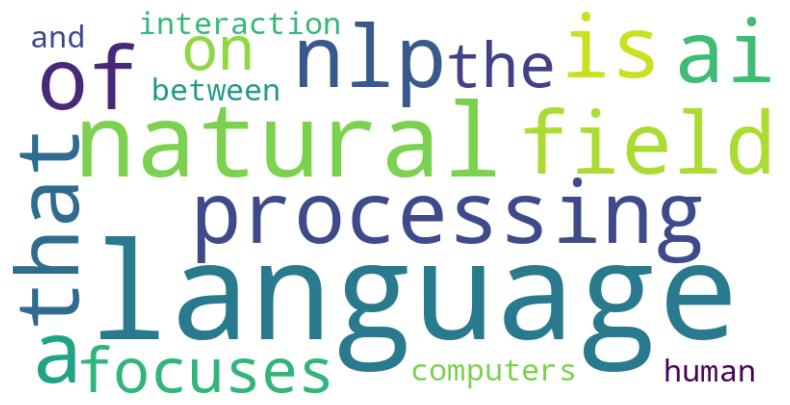

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
def generate_word_cloud(text):
    preprocessed_text = preprocess_text(text)
    word_counts = Counter(preprocessed_text)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    print("Word Frequencies:", word_counts)
    print(f"Total Words: {sum(word_counts.values())} \n");
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

text = """Natural Language Processing (NLP) is a field of AI that focuses on the interaction between computers and human language."""
generate_word_cloud(text)


**What the heck is ZIPF'S LAW??**

A lingusitic law that  defines an inverse relationship between word frequency and rank.  1st most commonly-used word will appear three more times than the 3th most commonly-used word.

"small number of words are popular and large number of words are rare"

How to code it?

1) Define Zipf law function, f(r)

2) Curve fit data to function

3) Result will give the constant and exponent values. (C and s)

4) Plot the graph to show data points



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


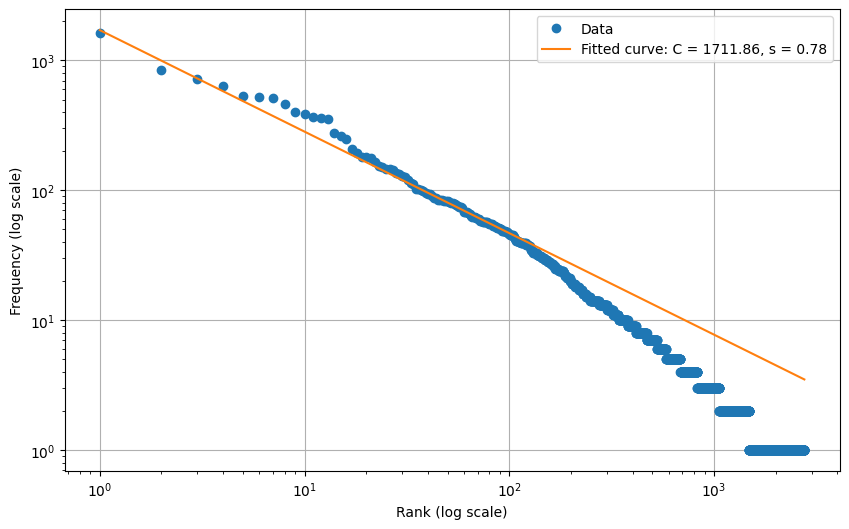

Fitted equation: f(r) = 1711.86 / r^0.78


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from collections import Counter
import nltk
import re
import requests

# Ensure nltk data is available
nltk.download('punkt')

# Step 1: Download the dataset (Alice in Wonderland from Project Gutenberg)
url = 'https://www.gutenberg.org/files/11/11-0.txt'
response = requests.get(url)
text = response.text

# Step 2: Preprocess the text
def preprocess(text):
    # Remove non-alphabetic characters and normalize to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    return tokens

tokens = preprocess(text)

# Step 3: Calculate word frequencies
word_freq = Counter(tokens)

# Step 4: Sort by frequency (most common first)
sorted_word_freq = word_freq.most_common()

# Step 5: Rank words and get their frequencies
ranks = np.arange(1, len(sorted_word_freq) + 1)
frequencies = np.array([freq for _, freq in sorted_word_freq])

# Step 6: Define the Zipf function to fit: f(r) = C / r^s
def zipf_law(rank, C, s):
    #print(C,s)
    return C / (rank ** s)

# Step 7: Fit the Zipf function to the data using curve_fit from scipy
popt, pcov = curve_fit(zipf_law, ranks, frequencies)

# Step 8: Extract the parameters
C, s = popt

#Step 9: Plot the data
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, 'o', label='Data')
plt.loglog(ranks, zipf_law(ranks, *popt), label=f"Fitted curve: C = {C:.2f}, s = {s:.2f}")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.legend()
plt.grid(True)
plt.show()
print(f"Fitted equation: f(r) = {C:.2f} / r^{s:.2f}")

**Reading the Zipf Graph**

Slope of the fitted curve:
The fitted Zipf curve represents the overall distribution of word frequencies across the entire corpus, from the most frequent words to the least frequent ones.
It is a global measure of how word frequencies decrease as you move from common words (like "the" or "is") to rare words. It provides a picture of the language's structure across all frequency ranges.


Slope found by hapax/dis legomena:
It reflects local lexical richness: how diverse the lower-frequency vocabulary is and how often new terms appear.


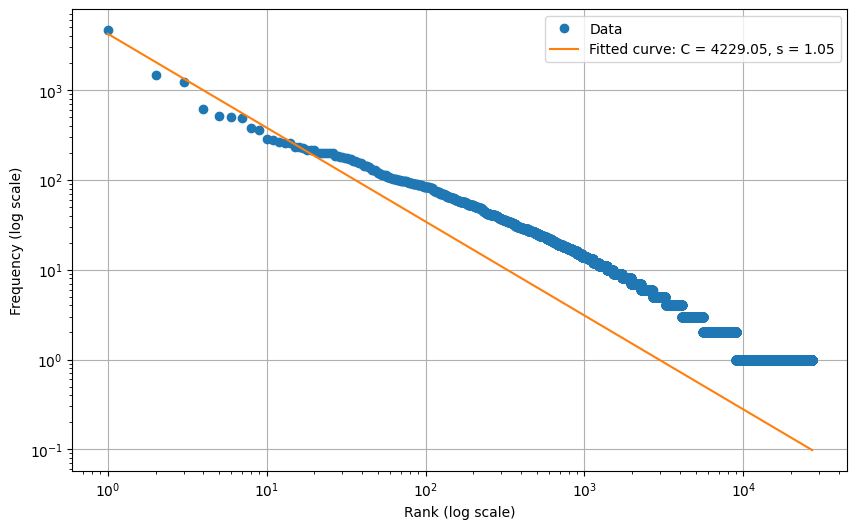

Fitted equation: f(r) = 4229.05 / r^1.05
Word Frequencies: Counter({'heyeti': 512, 'olan': 482, 'her': 287, 'iin': 263, 'kemal': 230, 'mustafa': 217, 'vesika': 200, 'a': 198, 'zati': 197, 'millet': 182, 'milletin': 180, 'milliye': 179, 'olarak': 175, 'biitiin': 169, 'sivas': 160, 'etmek': 160, 'hukuk': 156, 'miidafaai': 153, 'anadolu': 153, 'rica': 141, 'cemiyeti': 141, 'hazretlerine': 141, 'hiikumeti': 139, 'meclisi': 135, 'temsiliye': 129, 'iizere': 128, 'kuvayi': 127, 'bey': 124, 'kabul': 120, 'bulunan': 118, 'kolordu': 114, 'l': 112, 'vatan': 112, 'stylescope': 108, 'harbiye': 107, 'namina': 107, 'iki': 106, 'ali': 104, 'biiyiik': 103, 'milli': 101, 'dahi': 101, 'halde': 100, 'efendim': 100, 'hakkinda': 100, 'v': 98, 'bugiin': 98, 'bunun': 98, 'bazi': 97, 'kari': 95, 'firka': 94, 'kumandam': 93, 'suretle': 92, 'temin': 92, 'i': 91, 'beraber': 91, 'trakya': 90, 'oldugunu': 89, 'olmak': 89, 'edecek': 89, 'rumeli': 88, 'ferit': 88, 'sivasta': 87, 'hiikumet': 87, 'mediabutton': 85, 'ta

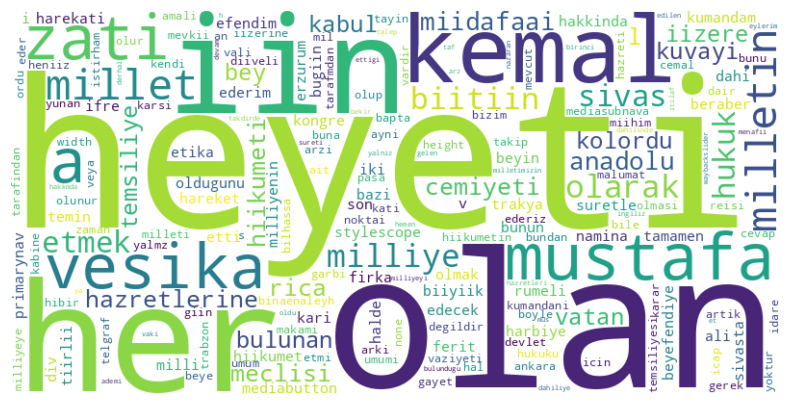

In [ ]:
#GENERAL ZIPF PLOT FUNCTION USING A URL INPUT

def zipf_law_plot(url):
  response = requests.get(url)
  text = response.text
  tokens = preprocess(text)
  word_freq = Counter(tokens)
  sorted_word_freq = word_freq.most_common()
  ranks = np.arange(1, len(sorted_word_freq) + 1)
  frequencies = np.array([freq for _, freq in sorted_word_freq])
  popt, pcov = curve_fit(zipf_law, ranks, frequencies)
  C, s = popt
  plt.figure(figsize=(10, 6))
  plt.loglog(ranks, frequencies, 'o', label='Data')
  plt.loglog(ranks, zipf_law(ranks, *popt), label=f"Fitted curve: C = {C:.2f}, s = {s:.2f}")
  plt.xlabel("Rank (log scale)")
  plt.ylabel("Frequency (log scale)")
  plt.legend()
  plt.grid(True)
  plt.show()
  print(f"Fitted equation: f(r) = {C:.2f} / r^{s:.2f}")
  return tokens

url = 'https://archive.org/stream/MustafaKemalAtatrkNutuk/NUTUK.%20KEMAL%20ATAT%C3%9CRK.%20Cilt%20III.%20Vesikalar.%C2%A0_djvu.txt'
tokens = zipf_law_plot(url)
turkish_stopwords = set([
    've', 'bir', 'bu', 'da', 'ile', 'gibi', 'ama', 'çok', 'de', 'diye',
    'ise', 'kadar', 'ben', 'sen', 'o', 'biz', 'siz', 'için', 'yani', 'ki','px','paa','daha','<','>','dan','en','böyle','dan','ancak','gore','mu','diger','daha','fakat','hatta','ne','display','ta','be','u','ha','ma','ka'
    ,'mi','nin','idi','k','mii','lit','te','ol','non','paga','böyle','igin','pek','classstylescope','eden','on','c','rem','oldugu','li','ederek','sonra','mediasubnav'
])

filtered_tokens = [word for word in tokens if word not in turkish_stopwords]
generate_word_cloud(' '.join(filtered_tokens))

#Lecture 2
